In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv('./high_diamond_ranked_10min.csv')
df.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


Text(0.5, 1.05, 'Correlation of Features')

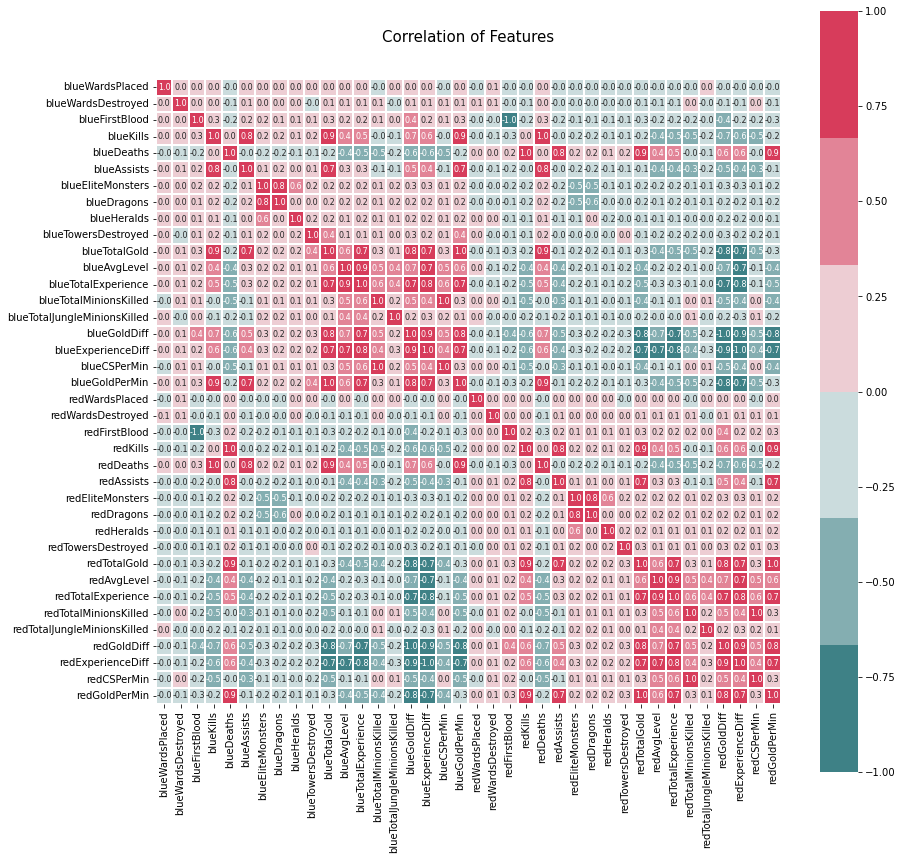

In [3]:
corr = df.iloc[:,2:].corr()
map = sns.diverging_palette(200, 5)
plt.figure(figsize=(14,14))
sns.heatmap(corr, square = True, annot=True, fmt= '.1f',annot_kws={'size': 8},
            cmap = map, linewidths=0.1, linecolor='white')
plt.title('Correlation of Features', y=1.05, size=15)

In [4]:
df = df.drop(df.columns[0], axis = 1)    # drop the 'gameId' column
df.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [5]:
df = df[df['blueWardsPlaced'] <= 50]  # drop the edge cases, wards placed > 50
df = df[df['redWardsPlaced'] <= 50]
df.shape
# drop the dependent features
df = df.drop(['blueEliteMonsters', 'blueGoldPerMin', 'redFirstBlood', 'redKills',
              'redDeaths', 'redEliteMonsters', 'redGoldDiff', 'redGoldPerMin'], axis = 1)
df.shape

(8780, 31)

In [6]:
(train, test) = train_test_split(df, train_size = 0.8, test_size=0.2, shuffle = True, stratify = df.blueWins, random_state = 0)
print(train['blueWins'].value_counts())
print(test['blueWins'].value_counts())

1    3528
0    3496
Name: blueWins, dtype: int64
1    882
0    874
Name: blueWins, dtype: int64


In [7]:
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]
y_train = train.iloc[:, :1]
y_test = test.iloc[:, :1]

In [8]:
# # Scaling
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [9]:
print("Training Data :",y_train.shape)
print("Testing Data :",y_test.shape)

Training Data : (7024, 1)
Testing Data : (1756, 1)


In [10]:
# Training Data
X_train = train.iloc[:,1:]
X_train = MinMaxScaler().fit_transform(X_train)
print("Training Data :", X_train.shape)

# Testing Data
X_test = test.iloc[:,1:]
X_test = MinMaxScaler().fit_transform(X_test)
print("Testing Data :", X_test.shape)

Training Data : (7024, 30)
Testing Data : (1756, 30)


In [11]:
# X_test.head(3)

In [12]:
X = tf.placeholder(tf.float32, [None,30])
Y = tf.placeholder(tf.float32, [None, 1])

In [13]:
# weight
W = tf.Variable(tf.random_normal([30,1], seed=0), name='weight')

# bias
b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

In [14]:
logits = tf.matmul(X,W) + b

In [15]:
hypothesis = tf.nn.sigmoid(logits)

cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)

In [16]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [17]:
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [18]:
def ann_slp():
    print("Training Data :", X_train.shape)
    print("Testing Data :", X_test.shape)

    X = tf.placeholder(tf.float32, [None,30])
    Y = tf.placeholder(tf.float32, [None, 1])

    W = tf.Variable(tf.random_normal([30,1], seed=0), name='weight')
    b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

    logits = tf.matmul(X,W) + b
    hypothesis = tf.nn.sigmoid(logits)
    
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: X_train, Y: y_train})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: X_train, Y: y_train})
                print("Step: {:5}\tAcc: {:.2%}".format(step, acc))

        train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: y_train})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: X_test, Y: y_test})
        
        print("Training accuracy =", train_acc)
        print("Test accuracy =", test_acc)
        
        return train_acc,test_acc

In [19]:
ann_slp_train_acc, ann_slp_test_acc = ann_slp()

Training Data : (7024, 30)
Testing Data : (1756, 30)
Step:     0	Acc: 47.37%
Step:  1000	Acc: 72.41%
Step:  2000	Acc: 72.92%
Step:  3000	Acc: 73.08%
Step:  4000	Acc: 73.15%
Step:  5000	Acc: 73.21%
Step:  6000	Acc: 73.36%
Step:  7000	Acc: 73.42%
Step:  8000	Acc: 73.39%
Step:  9000	Acc: 73.51%
Step: 10000	Acc: 73.56%
Training accuracy = 0.73562074
Test accuracy = 0.68906605


In [20]:
def ann_slp_pca():
    sklearn_pca = PCA(n_components=20)
    
    pca_train_x = sklearn_pca.fit_transform(X_train)
    print("PCA Training Data :", pca_train_x.shape)

    pca_test_x = sklearn_pca.fit_transform(X_test)
    print("PCA Testing Data :", pca_test_x.shape)

    X = tf.placeholder(tf.float32, [None,20])
    Y = tf.placeholder(tf.float32, [None, 1])

    W = tf.Variable(tf.random_normal([20,1], seed=0), name='weight')
    b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

    logits = tf.matmul(X,W) + b
    hypothesis = tf.nn.sigmoid(logits)
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: pca_train_x, Y: y_train})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: pca_train_x, Y: y_train})
                print("Step: {:5}\tAcc: {:.2%}".format(step, acc))

        train_acc = sess.run(accuracy, feed_dict={X: pca_train_x, Y: y_train})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: pca_test_x, Y: y_test})
        
        print("Training accuracy =", train_acc)
        print("Test accuracy =", test_acc)
        
        return train_acc,test_acc

In [21]:
ann_slp_pca_train_acc, ann_slp_pca_test_acc = ann_slp_pca()

PCA Training Data : (7024, 20)
PCA Testing Data : (1756, 20)
Step:     0	Acc: 60.22%
Step:  1000	Acc: 73.46%
Step:  2000	Acc: 73.53%
Step:  3000	Acc: 73.51%
Step:  4000	Acc: 73.52%
Step:  5000	Acc: 73.58%
Step:  6000	Acc: 73.62%
Step:  7000	Acc: 73.62%
Step:  8000	Acc: 73.62%
Step:  9000	Acc: 73.62%
Step: 10000	Acc: 73.56%
Training accuracy = 0.73562074
Test accuracy = 0.65091115


In [22]:
def ann_mlp():
    print("Training Data :", X_train.shape)
    print("Testing Data :", X_test.shape)

    X = tf.placeholder(tf.float32, [None,30])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([30,60], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([60], seed=0), name='bias1')
    layer1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([60,60], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([60], seed=0), name='bias2')
    layer2 = tf.nn.sigmoid(tf.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([60,90], seed=0), name='weight3')
    b3 = tf.Variable(tf.random_normal([90], seed=0), name='bias3')
    layer3 = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)
    # output
    W4 = tf.Variable(tf.random_normal([90,1], seed=0), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: X_train, Y: y_train})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: X_train, Y: y_train})
                print("Step: {:5}\tAcc: {:.2%}".format(step, acc))

        train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: y_train})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: X_test, Y: y_test})
        
        print("Training accuracy =", train_acc)
        print("Test accuracy =", test_acc)
        
        return train_acc,test_acc

In [23]:
ann_mlp_train_acc, ann_mlp_test_acc = ann_mlp()

Training Data : (7024, 30)
Testing Data : (1756, 30)
Step:     0	Acc: 49.77%
Step:  1000	Acc: 52.08%
Step:  2000	Acc: 60.85%
Step:  3000	Acc: 64.28%
Step:  4000	Acc: 65.79%
Step:  5000	Acc: 66.80%
Step:  6000	Acc: 67.45%
Step:  7000	Acc: 68.21%
Step:  8000	Acc: 68.64%
Step:  9000	Acc: 68.94%
Step: 10000	Acc: 69.49%
Training accuracy = 0.6949032
Test accuracy = 0.6976082


In [24]:
def ann_mlp_pca():
    sklearn_pca = PCA(n_components=20)

    pca_train_x = sklearn_pca.fit_transform(X_train)
    print("PCA Training Data :", pca_train_x.shape)

    pca_test_x = sklearn_pca.fit_transform(X_test)
    print("PCA Testing Data :", pca_test_x.shape)

    X = tf.placeholder(tf.float32, [None,20])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([20,64], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([64], seed=0), name='bias1')
    layer1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([64,128], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([128], seed=0), name='bias2')
    layer2 = tf.nn.sigmoid(tf.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([128,128], seed=0), name='weight3')
    b3 = tf.Variable(tf.random_normal([128], seed=0), name='bias3')
    layer3 = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([128,1], seed=0), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: pca_train_x, Y: y_train})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: pca_train_x, Y: y_train})
                print("Step: {:5}\tAcc: {:.2%}".format(step, acc))

        train_acc = sess.run(accuracy, feed_dict={X: pca_train_x, Y: y_train})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: pca_test_x, Y: y_test})
        
        print("Training accuracy =", train_acc)
        print("Test accuracy =", test_acc)
        
        return train_acc,test_acc

In [25]:
ann_mlp_pca_train_acc, ann_mlp_pca_test_acc = ann_mlp_pca()

PCA Training Data : (7024, 20)
PCA Testing Data : (1756, 20)
Step:     0	Acc: 50.23%
Step:  1000	Acc: 70.69%
Step:  2000	Acc: 71.77%
Step:  3000	Acc: 72.32%
Step:  4000	Acc: 72.76%
Step:  5000	Acc: 72.98%
Step:  6000	Acc: 73.33%
Step:  7000	Acc: 73.41%
Step:  8000	Acc: 73.38%
Step:  9000	Acc: 73.45%
Step: 10000	Acc: 73.53%
Training accuracy = 0.735336
Test accuracy = 0.62528473
